<a href="https://colab.research.google.com/github/Raviteja3112/Malaria_Detection_CNN/blob/main/malaria_project_11703695.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Importing Pandas to work on CSV files

In [2]:
import pandas as pd

My Dataset in Drive so i have import library to get my data from Drive.

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


With Pandas i have loaded csv files in train,test.

In [4]:
train=pd.read_csv("/content/gdrive/My Drive/train.csv")
test=pd.read_csv("/content/gdrive/My Drive/test.csv")

*Checking the dataset is loaded and shape of train and test*

In [5]:
train.head()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,...,pixel_2460,pixel_2461,pixel_2462,pixel_2463,pixel_2464,pixel_2465,pixel_2466,pixel_2467,pixel_2468,pixel_2469,pixel_2470,pixel_2471,pixel_2472,pixel_2473,pixel_2474,pixel_2475,pixel_2476,pixel_2477,pixel_2478,pixel_2479,pixel_2480,pixel_2481,pixel_2482,pixel_2483,pixel_2484,pixel_2485,pixel_2486,pixel_2487,pixel_2488,pixel_2489,pixel_2490,pixel_2491,pixel_2492,pixel_2493,pixel_2494,pixel_2495,pixel_2496,pixel_2497,pixel_2498,pixel_2499
0,Parasitized,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,187,0,0,0,0,0,0,0,0,...,0,0,61,187,186,188,188,186,187,187,188,187,187,186,187,132,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Parasitized,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,49,90,48,...,45,167,187,188,188,187,188,188,131,31,0,38,33,0,35,52,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Parasitized,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,155,190,190,190,192,190,191,190,20,1,1,1,1,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,1,1,1,1,64,183,182,182,185,189,190,95,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Parasitized,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,152,186,185,176,5,5,5,2,0,0,0,...,0,0,0,0,0,0,0,0,5,155,186,185,174,5,0,0,5,5,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Parasitized,0,0,0,0,0,0,0,0,0,0,0,0,10,188,187,185,184,185,183,181,181,180,180,180,180,180,179,179,179,180,178,179,133,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,63,187,188,188,188,64,0,0,148,190,139,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
test.tail()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,...,pixel_2460,pixel_2461,pixel_2462,pixel_2463,pixel_2464,pixel_2465,pixel_2466,pixel_2467,pixel_2468,pixel_2469,pixel_2470,pixel_2471,pixel_2472,pixel_2473,pixel_2474,pixel_2475,pixel_2476,pixel_2477,pixel_2478,pixel_2479,pixel_2480,pixel_2481,pixel_2482,pixel_2483,pixel_2484,pixel_2485,pixel_2486,pixel_2487,pixel_2488,pixel_2489,pixel_2490,pixel_2491,pixel_2492,pixel_2493,pixel_2494,pixel_2495,pixel_2496,pixel_2497,pixel_2498,pixel_2499
5507,Uninfected,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,113,173,173,175,131,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,128,186,187,185,186,133,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5508,Uninfected,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,0,58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,142,183,182,182,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5509,Uninfected,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,104,172,48,0,61,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5510,Uninfected,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,17,17,17,18,74,18,8,0,0,0,0,...,0,0,0,0,9,17,91,181,183,183,184,24,18,2,0,2,35,183,185,185,75,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5511,Uninfected,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,5,5,24,187,187,124,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5,172,186,187,187,186,188,187,186,188,189,187,187,57,5,141,187,187,6,1,0,0,0,0,0,0,0,0,0,0,0


In [7]:
train.shape, test.shape

((22046, 2501), (5512, 2501))

I have dropped label from training and make as x_train and add labels to y_train similary to x_test ,y_test

In [8]:
x_train  = train.drop(['label'],axis=1).values
y_train  = train['label'].values

x_test  = test.drop(['label'],axis=1).values
y_test  = test['label'].values


checked whether label has droped or not

In [9]:
x_train.shape,y_train.shape

((22046, 2500), (22046,))

Imported matplotlib.pyplot to ploting images with csv data.


> Index input not greater than 22,045 ...


> For "cmap" , I have tried many different formats but afmhot show me a better image to identify.


1.
Accent',  'BrBG','BuGn',  'CMRmap', 'Dark2', 'PuRd', 'PuRd_r', 'Purples',  'afmhot',  'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'gist_rainbow', 'gray','hot', 'hsv', 'hsv_r', ' 'jet','magma', 'ocean', 'ocean_r...



> Of all these only afmhot and gray are good to identify .









[1. 0.]
INFECTED Training Sample


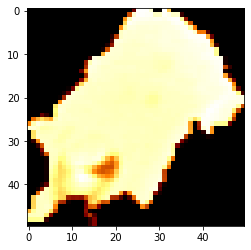

In [37]:
import matplotlib.pyplot as plt

index =31

if(index<=22045):
    plt.imshow(x_train[index].reshape(50,50),cmap='afmhot')
    print(y_train[index])
    if(y_train[index][0]==1):
      print("INFECTED Training Sample")
    else:
      print("HEALTHY Training Sample")
    


In [11]:
train.shape[0]

22046

Now everything converted into range(0-1) which is of black and white color and as float type. NORMALIZATION of Image

In [12]:
x_train = x_train.reshape(train.shape[0],50,50,1).astype('float32')
x_train = x_train / 255.0

x_test = x_test.reshape(test.shape[0],50,50,1).astype('float32')
x_test = x_test / 255.0


NORMALIZATION on Labels [Infected,Healthy]

In [13]:
from sklearn import preprocessing
converter = preprocessing.LabelBinarizer()
y_train = converter.fit_transform(y_train)
y_test = converter.fit_transform(y_test)


from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [21]:
print("x_train shape", x_train.shape)
print("Y_train shape", y_train.shape)
y_train

x_train shape (22046, 50, 50, 1)
Y_train shape (22046, 2)


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

Import all libraries for CNN.

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import layers


Input --> Convolution --> Max Pooling(reduce size) --> Flattern --> Deep Learning (Inputs layers) --> Dense(Hidden Layers) --> Dense(2/Output) ----> [Infected,Healthy]. 

In [16]:
model = Sequential()

model.add(Conv2D(filters=16,kernel_size=3,padding="same",activation="relu",input_shape=(50,50,1)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32,kernel_size=5,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64,kernel_size=5,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())

model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(2,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

In [17]:
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

Fitting into model to train the images with epochs=10,with batch_size.

In [18]:
model.fit(x_train,y_train,batch_size=20,epochs=10,verbose=1)

Epoch 1/10
1103/1103 [==============================] - 3s 3ms/step - loss: 0.4516 - accuracy: 0.7453
Epoch 2/10
1103/1103 [==============================] - 3s 3ms/step - loss: 0.1613 - accuracy: 0.9424
Epoch 3/10
1103/1103 [==============================] - 3s 3ms/step - loss: 0.1412 - accuracy: 0.9500
Epoch 4/10
1103/1103 [==============================] - 3s 3ms/step - loss: 0.1326 - accuracy: 0.9518
Epoch 5/10
1103/1103 [==============================] - 3s 3ms/step - loss: 0.1211 - accuracy: 0.9564
Epoch 6/10
1103/1103 [==============================] - 3s 3ms/step - loss: 0.1125 - accuracy: 0.9588
Epoch 7/10
1103/1103 [==============================] - 3s 3ms/step - loss: 0.1001 - accuracy: 0.9625
Epoch 8/10
1103/1103 [==============================] - 3s 3ms/step - loss: 0.0915 - accuracy: 0.9671
Epoch 9/10
1103/1103 [==============================] - 3s 3ms/step - loss: 0.0773 - accuracy: 0.9713
Epoch 10/10
1103/1103 [==============================] - 3s 3ms/step - loss: 0.066

Evaluating our model with accuracy result of model

In [19]:
predictions = model.evaluate(x_test,y_test)

173/173 [==============================] - 0s 2ms/step - loss: 0.1691 - accuracy: 0.9541


Finally Prediction our model with input of any image in Test.csv data. 

> Index input not greater than 5511...



In [40]:
import numpy as np

index = int(input("Enter your BLOOD sample ID: "))

if(index<=5511):
  if(y_test[index][0]==1):
    print('Infected! You need medicines.\n')
  else:
     print("Hey! Thank God , You are Safe.\n")

  print("Actual ",y_test[index].astype('int'))

  print("Predicted value is:",model.predict(np.array([x_test[index]])))


  plt.imshow(x_test[index].reshape(50,50),cmap='afmhot')

else:
  print("There is NO such id number in this lab.")


Enter your BLOOD sample ID: 6000
There is NO such id number in this lab.
